## EDA and Data Cleaning for NYC Dept of Fin

###  Import libraries

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)

In [123]:
import os
current_dir = os.getcwd()

### Load data

In [124]:
df = pd.read_csv('../data/nyc_dept_fin.csv')

In [125]:
df.head()

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,building_class_at_present,address,apartment_number,zip_code,...,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,price_per_sqft
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,376,43.0,S1,743 EAST 6TH STREET,NaN,10009.0,...,1.0,2.0,2090.0,3680.0,1940.0,1,S1,3200000.0,7/24/19,869.565217
1,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61.0,A4,189 EAST 7TH STREET,NaN,10009.0,...,0.0,1.0,987.0,2183.0,1860.0,1,A4,0.0,9/25/19,0.000000
2,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,404,1.0,B9,166 AVENUE A,NaN,10009.0,...,0.0,2.0,1510.0,4520.0,1900.0,1,B9,0.0,7/22/19,0.000000
3,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377,56.0,C0,263 EAST 7TH STREET,NaN,10009.0,...,0.0,3.0,2430.0,3600.0,1899.0,1,C0,6300000.0,4/30/19,1750.000000
4,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,393,9.0,C0,604 EAST 11TH STREET,NaN,10009.0,...,0.0,3.0,2375.0,5110.0,1939.0,1,C0,0.0,10/24/19,0.000000


###  EDA and Data Cleaning

In [126]:
# Check the shape of the data
df.shape

(79071, 21)

In [127]:
# Check nulls and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79071 entries, 0 to 79070
Data columns (total 21 columns):
borough                           79071 non-null int64
neighborhood                      79071 non-null object
building_class_category           79071 non-null object
tax_class_at_present              78765 non-null object
block                             79071 non-null int64
lot                               79071 non-null float64
building_class_at_present         78765 non-null object
address                           79071 non-null object
apartment_number                  17728 non-null object
zip_code                          79057 non-null float64
residential_units                 63284 non-null float64
commercial_units                  63284 non-null float64
total_units                       63284 non-null float64
land_square_feet                  63284 non-null float64
gross_square_feet                 63285 non-null float64
year_built                        73350 non-nu

In [128]:
# Check percentage of null values
df.isnull().mean().sort_values(ascending=False) 

apartment_number                  0.775796
price_per_sqft                    0.260500
land_square_feet                  0.199656
commercial_units                  0.199656
total_units                       0.199656
residential_units                 0.199656
gross_square_feet                 0.199643
year_built                        0.072353
building_class_at_present         0.003870
tax_class_at_present              0.003870
zip_code                          0.000177
tax_class_at_time_of_sale         0.000000
building_class_at_time_of_sale    0.000000
sale_date                         0.000000
sale_price                        0.000000
address                           0.000000
lot                               0.000000
block                             0.000000
building_class_category           0.000000
neighborhood                      0.000000
borough                           0.000000
dtype: float64

#### Change Data Types

In [129]:
def col_convert_float_to_int(col_list, df):
    for i in col_list:
        df[i] = df[i].astype('Int64')
    return df

In [130]:
list_of_col_to_int = ['borough', 'block', 'zip_code', 'year_built', 'tax_class_at_time_of_sale']

In [131]:
df = col_convert_float_to_int(list_of_col_to_int, df)

In [132]:
# Check general info of numerical columns
df.describe()

,borough,block,lot,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,sale_price,price_per_sqft
count,79071.000000,79071.000000,79071.000000,79057.000000,63284.000000,63284.000000,63284.000000,6.328400e+04,6.328500e+04,73350.000000,79071.000000,7.907100e+04,5.847300e+04
mean,2.989225,4420.006108,358.436304,10860.840786,2.167862,0.262562,2.430425,3.306690e+03,3.207432e+03,1950.509843,1.617774,1.430173e+06,inf
std,1.280595,3695.799417,643.130068,562.945244,10.188677,5.235532,11.520441,8.097639e+04,2.386094e+04,35.067876,0.797040,1.340893e+07,NaN
min,1.000000,1.000000,1.000000,10001.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1018.000000,1.000000,0.000000e+00,0.000000e+00
25%,2.000000,1344.000000,22.000000,10306.000000,1.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,1925.000000,1.000000,0.000000e+00,0.000000e+00
50%,3.000000,3497.000000,50.000000,11210.000000,1.000000,0.000000,1.000000,2.040000e+03,1.480000e+03,1945.000000,1.000000,4.700000e+05,3.719388e+02
75%,4.000000,6602.000000,380.000000,11358.000000,2.000000,0.000000,2.000000,3.100000e+03,2.376000e+03,1970.000000,2.000000,8.882650e+05,NaN
max,5.000000,16350.000000,9109.000000,11697.000000,826.000000,842.000000,842.000000,1.985040e+07,2.400000e+06,2020.000000,4.000000,2.155000e+09,inf


In [133]:
# Check general info of categorical columns
df.describe(include=object)

,neighborhood,building_class_category,tax_class_at_present,building_class_at_present,address,apartment_number,building_class_at_time_of_sale,sale_date
count,79071,79071,78765,78765,79071,17728,79071,79071
unique,258,44,10,167,76409,3895,167,364
top,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,D4,N/A BEACH 28 STREET,4,D4,6/27/19
freq,2374,17864,37822,11679,13,284,11679,642


#### Drop unnecessary columns

In [134]:
# Only keep the columns we care about, and make a new dataframe.
columns_to_keep = ['borough', 'neighborhood', 'building_class_category', 'address', 
                   'zip_code', 'gross_square_feet', 'sale_price']
df = df[columns_to_keep]

In [135]:
# Check percentage of null in the new dataframe
df.isnull().mean().sort_values(ascending=False) 

gross_square_feet          0.199643
zip_code                   0.000177
sale_price                 0.000000
address                    0.000000
building_class_category    0.000000
neighborhood               0.000000
borough                    0.000000
dtype: float64

#### Deal with null values in column 'gross_square_feet'

In [136]:
# Check for all the observations that are missing 'gross_square_feet'
# what are the percentage of each building category
df.loc[np.isfinite(df['gross_square_feet']) == False]['building_class_category'].value_counts(normalize=True)

10 COOPS - ELEVATOR APARTMENTS                0.753642
09 COOPS - WALKUP APARTMENTS                  0.153237
17 CONDO COOPS                                0.064551
13 CONDOS - ELEVATOR APARTMENTS               0.012733
01 ONE FAMILY DWELLINGS                       0.009249
15 CONDOS - 2-10 UNIT RESIDENTIAL             0.002534
12 CONDOS - WALKUP APARTMENTS                 0.002090
44 CONDO PARKING                              0.000950
11 SPECIAL CONDO BILLING LOTS                 0.000317
28 COMMERCIAL CONDOS                          0.000253
46 CONDO STORE BUILDINGS                      0.000253
42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC     0.000063
02 TWO FAMILY DWELLINGS                       0.000063
16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT    0.000063
Name: building_class_category, dtype: float64

Note: in NYC, the information of gross square feet is not required during sales. Therefore there are many missing data in the column 'gross_square_feet'. However, we cannot just drop this column since a large percentage of them are in the building class categories that we care about, such as coops and condos

#### Check distributions of each building categories
We only want to keep residential properties to calculate the wealthness of the neighborhood.

In [137]:
df.groupby('building_class_category')['building_class_category'].count().sort_values(ascending=False)

building_class_category
01 ONE FAMILY DWELLINGS                       17864
02 TWO FAMILY DWELLINGS                       15454
10 COOPS - ELEVATOR APARTMENTS                11897
13 CONDOS - ELEVATOR APARTMENTS               11312
03 THREE FAMILY DWELLINGS                      4475
07 RENTALS - WALKUP APARTMENTS                 2830
09 COOPS - WALKUP APARTMENTS                   2419
04 TAX CLASS 1 CONDOS                          1547
15 CONDOS - 2-10 UNIT RESIDENTIAL              1364
05 TAX CLASS 1 VACANT LAND                     1244
44 CONDO PARKING                               1158
12 CONDOS - WALKUP APARTMENTS                  1096
17 CONDO COOPS                                 1019
22 STORE BUILDINGS                              913
14 RENTALS - 4-10 UNIT                          605
29 COMMERCIAL GARAGES                           461
21 OFFICE BUILDINGS                             386
08 RENTALS - ELEVATOR APARTMENTS                375
31 COMMERCIAL VACANT LAND               

In [138]:
building_categories_to_keep = ['01 ONE FAMILY DWELLINGS', '02 TWO FAMILY DWELLINGS',
                               '10 COOPS - ELEVATOR APARTMENTS', '13 CONDOS - ELEVATOR APARTMENTS',
                               '03 THREE FAMILY DWELLINGS', '07 RENTALS - WALKUP APARTMENTS',
                               '09 COOPS - WALKUP APARTMENTS', '04 TAX CLASS 1 CONDOS',
                               '15 CONDOS - 2-10 UNIT RESIDENTIAL','12 CONDOS - WALKUP APARTMENTS', 
                               '17 CONDO COOPS']

In [139]:
# Only keep oberservations that is in the above building category 
df = df.loc[df['building_class_category'].isin(building_categories_to_keep)]

#### Check distributions of 'sale_price'

In [140]:
df.describe()

,borough,zip_code,gross_square_feet,sale_price
count,71277.000000,71277.000000,55521.000000,7.127700e+04
mean,2.988650,10859.066866,1728.967958,8.358510e+05
std,1.287558,565.372339,2482.733978,2.496589e+06
min,1.000000,10001.000000,0.000000,0.000000e+00
25%,2.000000,10306.000000,0.000000,0.000000e+00
50%,3.000000,11210.000000,1520.000000,4.700000e+05
75%,4.000000,11361.000000,2295.000000,8.545000e+05
max,5.000000,11697.000000,84526.000000,2.399582e+08


In [141]:
np.percentile(df['sale_price'], 75)

854500.0

In [142]:
np.quantile(df['sale_price'], 0.75)

854500.0

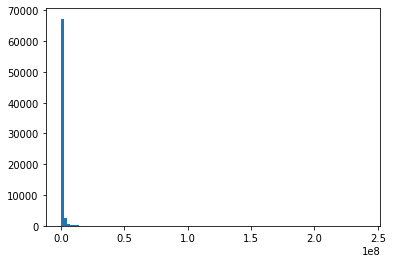

In [143]:
# As we can see from the histogram, there are a lot of sale price = 0, causing the dataset to be extremely right skewed
plt.hist(df['sale_price'], bins=100);

In [144]:
# Get rid of obervations where sale price <50k
df = df.loc[df['sale_price'] >= 50_000]

In [145]:
df.shape

(48847, 7)

In [146]:
df.describe()

,borough,zip_code,gross_square_feet,sale_price
count,48847.000000,48847.000000,35245.000000,4.884700e+04
mean,2.906279,10816.505353,1519.107221,1.219505e+06
std,1.331625,579.299270,2381.511790,2.937239e+06
min,1.000000,10001.000000,0.000000,5.000000e+04
25%,1.000000,10280.000000,0.000000,4.500000e+05
50%,3.000000,11207.000000,1344.000000,6.900000e+05
75%,4.000000,11358.000000,2100.000000,1.100000e+06
max,5.000000,11697.000000,84526.000000,2.399582e+08


#### Define an Affluence Threshold

In [147]:
# Median sale price for all 5 boroughs
df['sale_price'].median() 

690000.0

In [148]:
# Mean sale price for all 5 boroughs
df['sale_price'].mean()

1219505.4491575737

If a neiberhood's median sale price is above the NYC home sale prices, we define the neiborhood as "affulent", otherwise "not affulent".

## Import Cluster Created From Yelp Data

In [149]:
yelp_clusters = pd.read_csv('../data/cluster_zip_2.csv')

In [150]:
yelp_clusters.head()

,zipcode,cluster
0,10001,8
1,10002,36
2,10003,52
3,10004,0
4,10005,0


In [151]:
yelp_clusters.shape

(170, 2)

In [152]:
# Turn dataframe into a dictionary
cluster_dict = dict(zip(yelp_clusters['zipcode'], yelp_clusters['cluster']))

In [153]:
# Check key and values in the dictionary
print(len(set(cluster_dict.values())))
print(len(set(cluster_dict.keys())))

60
170


In [154]:
df.head()

,borough,neighborhood,building_class_category,address,zip_code,gross_square_feet,sale_price
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,743 EAST 6TH STREET,10009,3680.0,3200000.0
3,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,263 EAST 7TH STREET,10009,3600.0,6300000.0
5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,300 EAST 3RD STREET,10009,7989.0,1950000.0
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,332 EAST 4TH STREET,10009,17478.0,14000000.0
8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,"262 EAST 7TH STREET, 4",10009,4154.0,600000.0


## Integrate Yelp clusters into NYC dept fin dataframe

There are more zipcodes in the NYC dept fin home sale dataset than the Yelp Clusters. The following two steps will be taken in order to integrate the Yelp clusters:  
       - step 1: filter NYC dept fin data-frame and only choose those observations that has a matching Zip Code in yelp clusters 
       - step 2: Using zipcode to match each property with a cluster.

In [155]:
# Total number of zipcodes in the NYC dept fin dataset
len(set(df['zip_code']))

183

In [156]:
# Total number of zipcodes in the Yelp Clusters dataset
len(set(cluster_dict.keys()))

170

In [157]:
df.shape

(48847, 7)

In [158]:
df = df[df['zip_code'].isin(set(cluster_dict.keys()))]

In [159]:
df.shape

(47358, 7)

In [160]:
# Create cluster column for the NYC dept fin dataset
df['cluster'] = [cluster_dict[zipcode] for zipcode in df['zip_code']]

In [161]:
df.head()

,borough,neighborhood,building_class_category,address,zip_code,gross_square_feet,sale_price,cluster
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,743 EAST 6TH STREET,10009,3680.0,3200000.0,52
3,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,263 EAST 7TH STREET,10009,3600.0,6300000.0,52
5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,300 EAST 3RD STREET,10009,7989.0,1950000.0,52
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,332 EAST 4TH STREET,10009,17478.0,14000000.0,52
8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,"262 EAST 7TH STREET, 4",10009,4154.0,600000.0,52


In [162]:
# Check if cluster is correctly integrated
merged = dict(zip(df['zip_code'], df['cluster']))
assert all([merged[k] == cluster_dict[k] for k in merged])

### Calculate mean/ median property values for each cluster

In [163]:
df_median_property_value_per_cluster = pd.DataFrame(df.groupby('cluster')['sale_price'].median())

In [164]:
pd.DataFrame(df.groupby('cluster')['sale_price'].mean())

,sale_price
cluster,
0,2.530363e+06
1,7.028661e+05
2,1.058682e+06
3,1.050850e+06
4,8.969489e+05
5,5.560825e+05
6,8.027737e+05
7,1.346336e+06
8,2.099355e+06


In [166]:
df['sale_price'].quantile([.25, .50, .75])

0.25     450000.0
0.50     690000.0
0.75    1100000.0
Name: sale_price, dtype: float64

In [169]:
df_median_property_value_per_cluster['aff_rank'] = [4 if i >= 1100000 else 3 if i >=690000 else 2 if i>=450000 else 1 for i in df_median_property_value_per_cluster['sale_price']]


In [170]:
df_median_property_value_per_cluster.head(25)

,sale_price,aff_rank
cluster,,
0,1404586.0,4
1,620000.0,2
2,970000.0,3
3,850000.0,3
4,550000.0,2
5,552500.0,2
6,595000.0,2
7,1080000.0,3
8,1385000.0,4


In [171]:
df_median_property_value_per_cluster.drop(columns=['sale_price'], inplace=True)

In [172]:
df_median_property_value_per_cluster['aff_rank'].value_counts(normalize=True)

2    0.466667
3    0.283333
4    0.166667
1    0.083333
Name: aff_rank, dtype: float64

In [173]:
df_median_property_value_per_cluster.to_csv('../data/cluster_affluent_rank.csv')